In [213]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

**Загрузка данных и начальное исследование**

In [234]:
df = pd.read_csv('fifa19_data.csv')

In [235]:
df = df.drop(['Photo','Nationality','Club', 'Club Logo','Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
             'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause','Real Face', 'Crossing','ID','Flag','Special',
              'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB',"Name","Age",
       'RB'],axis=1)

In [236]:
df.columns

Index(['Unnamed: 0', 'Overall', 'Potential', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Height', 'Weight'],
      dtype='object')

In [237]:
df = df.rename(columns={'Unnamed: 0': 'IsGk'})

Переведем высоту футболистов из футов в сантиметры, а также убираем суффикс "lbs" у веса

In [238]:
def parse_ht(ht):
    ht = ht.replace("'",".")
    ht_ = float(ht)
    return (28.575*ht_)

df["Height"] = df["Height"].apply(lambda x:parse_ht(x))

def parse_weight(ht):
    ht = ht.replace("l","")
    ht = ht.replace("b","")
    ht = ht.replace("s","")
    return ht

df["Weight"] = df["Weight"].apply(lambda x:parse_weight(x))

Аналогично убираем лишние знаки у стоимость футболиста и его заработной платы

In [239]:
def parse_value(ht):
    ht = ht.replace("€","")
    ht = ht.replace("M","")
    return ht

df["Value"] = df["Value"].apply(lambda x:parse_value(x))

def parse_wage(ht):
    ht = ht.replace("€","")
    ht = ht.replace("K","")
    return ht

df["Wage"] = df["Wage"].apply(lambda x:parse_wage(x))

In [240]:
isinstance("srt",str)

True

Далее вводим классификацию голкипер\не_голкипер

In [241]:
df.loc[df['Position']=='GK', 'IsGk'] = 1
df.loc[df['Position']!='GK', 'IsGk'] = 0


Переводим данные с типом строка в данные с порядковым типом

In [244]:
labelencoder=LabelEncoder()
for column in df.columns:
    if isinstance(df[column][0],str)==True:
        df[column] = labelencoder.fit_transform(df[column])

In [245]:
df.head(10)

,IsGk,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight
0,0,94,94,9,93,0,5,4,4,7,3,21,162.87750,13
1,0,94,94,130,74,1,5,4,5,1,0,26,177.16500,24
2,0,92,93,10,56,1,5,5,5,2,4,14,168.59250,9
3,1,91,93,127,50,1,4,3,1,7,2,5,182.88000,17
4,0,91,92,6,67,1,4,5,4,0,5,19,146.01825,11
5,0,91,91,140,65,1,4,4,4,2,5,11,165.73500,15
6,0,91,91,122,77,1,4,4,4,0,2,19,165.73500,7
7,0,91,91,134,81,1,5,4,3,2,5,23,171.45000,27
8,0,91,91,100,71,1,4,3,3,2,5,18,171.45000,23
9,1,90,93,123,132,1,3,3,1,7,5,5,177.16500,28


In [246]:
df.describe()

,IsGk,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,0.108891,80.621379,82.501499,49.111888,60.011988,0.767233,2.142857,3.271728,3.001998,3.961039,4.163836,11.546454,166.724420,18.130869
std,0.311658,3.038668,3.752632,44.862607,38.169672,0.422806,0.866355,0.748392,1.038266,2.693229,1.759298,8.490824,12.932121,7.315317
min,0.000000,77.000000,77.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.732500,0.000000
25%,0.000000,78.000000,80.000000,14.000000,27.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,160.020000,13.000000
50%,0.000000,80.000000,82.000000,31.000000,60.000000,1.000000,2.000000,3.000000,3.000000,5.000000,5.000000,10.000000,171.450000,18.000000
75%,0.000000,82.000000,85.000000,79.000000,89.000000,1.000000,3.000000,4.000000,4.000000,7.000000,5.000000,19.000000,177.165000,23.000000
max,1.000000,94.000000,95.000000,140.000000,137.000000,1.000000,5.000000,5.000000,5.000000,7.000000,8.000000,26.000000,191.452500,40.000000


**Быстрый взгляд на характеристики данных**

График характеристик футболисток ниже представляет распределение классификационных характеристик. Можно увидеть, что свойство футболиста «Skill Moves» распадается на две части, одну ниже 1 и одну выше 1, что может способствовать классификации. Более жизненно было бы взять за основу класификации рост футболиста (после 180см идут в основном вратари).

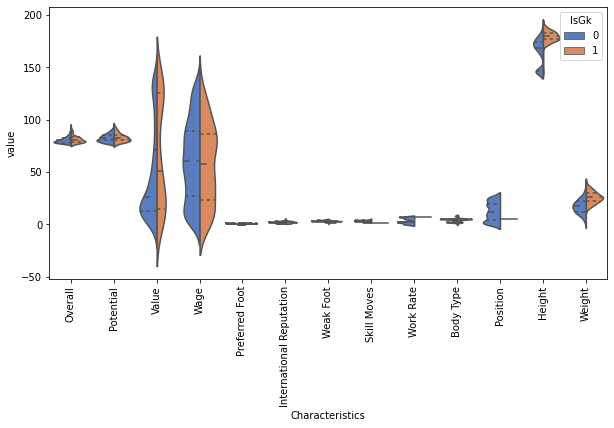

In [247]:
df_div = pd.melt(df, "IsGk", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y='value', hue="IsGk", split = True, data=df_div, inner = 'quartile', palette="muted")
df_no_class = df.drop(["IsGk"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

**Проверяем данные на сбалансированность**

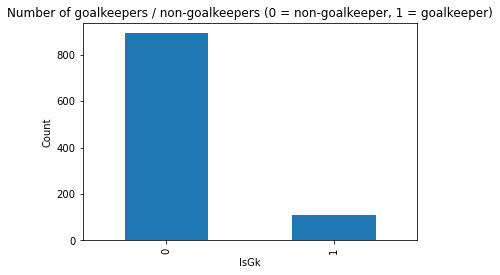

In [250]:
plt.figure()
pd.Series(df['IsGk']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("IsGk")
plt.title('Number of goalkeepers / non-goalkeepers (0 = non-goalkeeper, 1 = goalkeeper)');

Датасет не сбалансирован 

Давайте посмотрим на корреляцию между переменными:

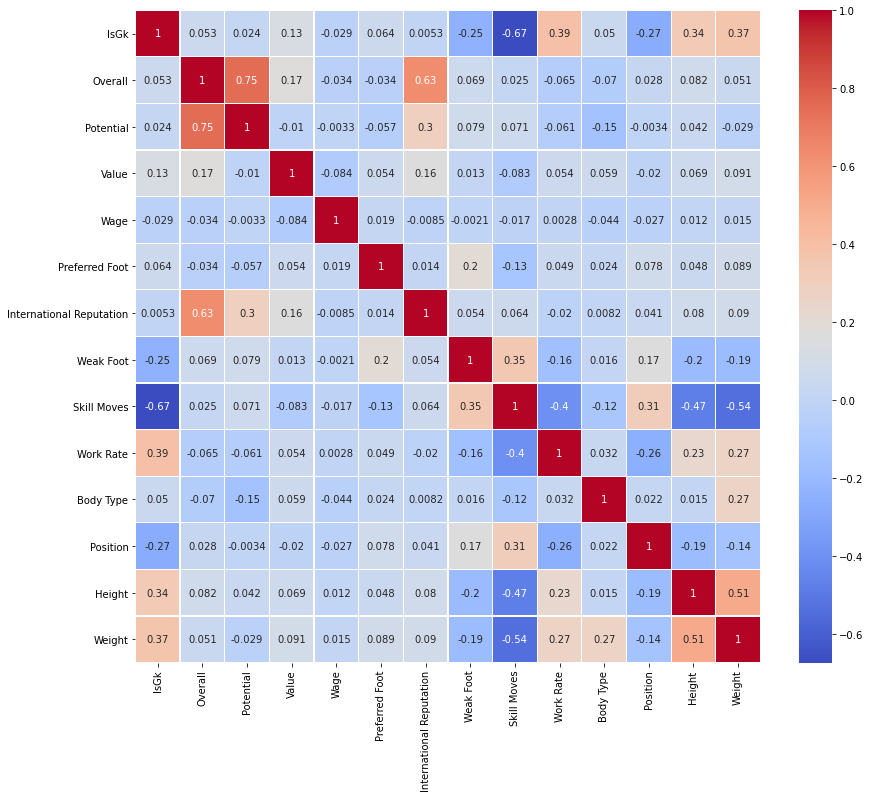

In [249]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.2,cmap="coolwarm", annot=True)
plt.yticks(rotation=0);

Обычно наименее коррелирующая переменная является наиболее важной для классификации. В данном случае «Skill Moves» имеет значение -0,67, поэтому давайте внимательно рассмотрим его:

In [251]:
df[['IsGk', 'Skill Moves']].groupby(['Skill Moves'], as_index=False).mean().sort_values(by='IsGk', ascending=False)

,Skill Moves,IsGk
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


Давайте внимательно посмотрим на признак «gill-color»:

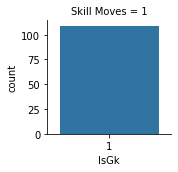

In [253]:
new_var=df[['IsGk', 'Skill Moves']]
new_var=new_var[new_var['Skill Moves']<=1]
sns.factorplot('IsGk', col='Skill Moves', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

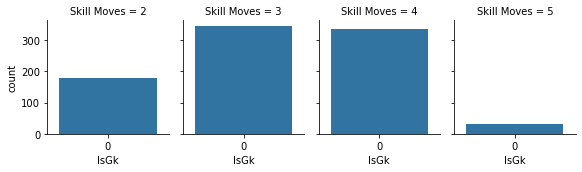

In [254]:
new_var=df[['IsGk', 'Skill Moves']]
new_var=new_var[new_var['Skill Moves']>1]

sns.factorplot('IsGk', col='Skill Moves', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

In [256]:
X = df.drop(['IsGk'], axis=1)
y = df['IsGk']

### Сравним полученные результаты с моделями реализованными в scikit-learn

In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from ml_algos import *

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [258]:
def cv(model, X, y, k_folds=5):
    kf = KFold(n_splits=k_folds, random_state=16, shuffle=True)
    scores = np.zeros(k_folds)    
    for i, (train_index, val_index) in enumerate(kf.split(X, y)):
        X_train, y_train = X.loc[train_index].to_numpy(), y.loc[train_index].to_numpy()
        X_val, y_val = X.loc[val_index].to_numpy(), y.loc[val_index].to_numpy()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        scores[i] = accuracy_score(y_val, y_pred)
    return scores

In [259]:
%%time
model = LogisticRegression()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.9990049751243781
Wall time: 1.32 s


In [260]:
%%time
model = LR()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.9051592039800995
Wall time: 5.27 s


In [40]:
%%time
model = KNeighborsClassifier(n_neighbors=5)
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.9987690791966652
Wall time: 2.83 s


In [41]:
%%time
model = KNN(nn=5)
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.9986459264873059
Wall time: 10.7 s


In [261]:
%%time
model = DecisionTreeClassifier(max_depth=3)
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  1.0
Wall time: 305 ms


In [262]:
%%time
model = DTC()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  1.0
Wall time: 1.63 s


In [263]:
%%time
model = RandomForestClassifier()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  1.0
Wall time: 3.02 s


In [264]:
%%time
model = RFC()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.8911592039800995
Wall time: 4.65 s
